<a href="https://colab.research.google.com/github/jucXie/T20DataAnalytics/blob/main/T20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
df_batting = pd.read_csv('batting_summary.csv')
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,runs,balls,fours,sixes,SR,match_id,out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,T20I # 1823,1
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,T20I # 1823,1
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,T20I # 1823,1
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,T20I # 1823,1
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus,20,24,0,0,83.33,T20I # 1823,1
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,T20I # 1823,1
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,T20I # 1823,1
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,T20I # 1823,0
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,T20I # 1823,1
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,T20I # 1823,1


In [4]:
df_batting["Boundary_Runs"] = df_batting["fours"]*4 + df_batting["sixes"]*6
df_batting.tail(15)

,match,teamInnings,battingPos,batsmanName,runs,balls,fours,sixes,SR,match_id,out,Boundary_Runs
684,Pakistan Vs England,Pakistan,3,Mohammad Haris,8,12,1,0,66.66,T20I # 1879,1,4
685,Pakistan Vs England,Pakistan,4,Shan Masood,38,28,2,1,135.71,T20I # 1879,1,14
686,Pakistan Vs England,Pakistan,5,Iftikhar Ahmed,0,6,0,0,0.00,T20I # 1879,1,0
687,Pakistan Vs England,Pakistan,6,Shadab Khan,20,14,2,0,142.85,T20I # 1879,1,8
688,Pakistan Vs England,Pakistan,7,Mohammad Nawaz,5,7,0,0,71.42,T20I # 1879,1,0
689,Pakistan Vs England,Pakistan,8,Mohammad Wasim,4,8,0,0,50.00,T20I # 1879,1,0
690,Pakistan Vs England,Pakistan,9,Shaheen Shah Afridi,5,3,1,0,166.66,T20I # 1879,0,4
691,Pakistan Vs England,Pakistan,10,Haris Rauf,1,1,0,0,100.00,T20I # 1879,0,0
692,Pakistan Vs England,England,1,Jos Buttler,26,17,3,1,152.94,T20I # 1879,1,18
693,Pakistan Vs England,England,2,Alex Hales,1,2,0,0,50.00,T20I # 1879,1,0


In [5]:
Total_Runs = df_batting.groupby(['batsmanName']).agg({'runs': 'sum', 'out': 'sum', 'balls': 'sum', 'Boundary_Runs': 'sum','battingPos':'sum','match_id':'count'})
Total_Runs.tail(15)


,runs,out,balls,Boundary_Runs,battingPos,match_id
batsmanName,,,,,,
Tom Cooper,107,8,103,46,34,8
Tony Munyonga,7,2,10,4,9,2
Tristan Stubbs,31,3,31,14,16,3
Usman Ghani,59,3,64,26,8,3
Vikramjit Singh,57,5,62,32,7,5
Virat Kohli,296,3,217,148,18,6
Vriitya Aravind,48,3,71,12,11,3
Wanindu Hasaranga de Silva,25,5,34,8,43,6
Wayne Parnell,5,2,13,0,28,4


1) Total_runs -> Total number of runs scored by the batsman



In [6]:
player_runScored = Total_Runs.loc[Total_Runs['runs']>150,['runs']]
player_runScored

,runs
batsmanName,
Alex Hales,212
Andy Balbirnie,153
Colin Ackermann,165
Dhananjaya de Silva,177
Glenn Phillips,201
Jos Buttler,225
Kane Williamson,178
Kusal Mendis,223
Lorcan Tucker,204


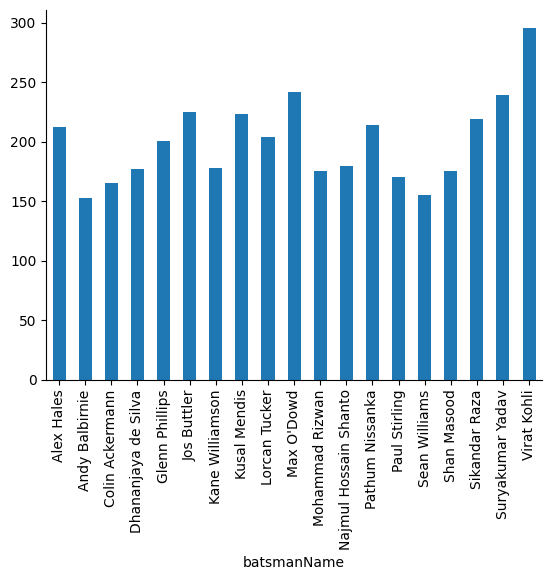

In [ ]:
from matplotlib import pyplot as plt
player_runScored['runs'].plot(kind='bar')
plt.gca().spines[['top', 'right',]].set_visible(False)

2) Total_inningsBatted -> Total number of innings a batsman got a chance to bat

In [7]:
#Total_inningsBatted = df_batting.groupby(['batsmanName']).count()
#Total_inningsBatted.iloc[:]['match_id']
Total_Runs['match_id'].iloc[-15:]

,match_id
batsmanName,
Tom Cooper,8
Tony Munyonga,2
Tristan Stubbs,3
Usman Ghani,3
Vikramjit Singh,5
Virat Kohli,6
Vriitya Aravind,3
Wanindu Hasaranga de Silva,6
Wayne Parnell,4


3) Total_inningsDismissed -> To find the number of innings batsman got out

In [8]:
Total_Runs.iloc[:]['out'].tail(12)


,out
batsmanName,
Usman Ghani,3
Vikramjit Singh,5
Virat Kohli,3
Vriitya Aravind,3
Wanindu Hasaranga de Silva,5
Wayne Parnell,2
Wellington Masakadza,1
Wessly Madhevere,7
Yasir Ali,2


4) Batting_Avg = Average runs scored in an innings

In [9]:
import numpy as np
Total_Runs['Batting_Avg'] =  np.divide(Total_Runs['runs'],Total_Runs['out']).replace([np.inf, -np.inf], 0).round(2)
Total_Runs.tail(12)

,runs,out,balls,Boundary_Runs,battingPos,match_id,Batting_Avg
batsmanName,,,,,,,
Usman Ghani,59,3,64,26,8,3,19.67
Vikramjit Singh,57,5,62,32,7,5,11.40
Virat Kohli,296,3,217,148,18,6,98.67
Vriitya Aravind,48,3,71,12,11,3,16.00
Wanindu Hasaranga de Silva,25,5,34,8,43,6,5.00
Wayne Parnell,5,2,13,0,28,4,2.50
Wellington Masakadza,1,1,7,0,8,1,1.00
Wessly Madhevere,106,7,83,72,16,8,15.14
Yasir Ali,5,2,9,0,19,3,2.50


5) Total balls Faced -> Total number of balls faced by the batsman

In [10]:
Total_Runs.iloc[-15:]['balls']

,balls
batsmanName,
Tom Cooper,103
Tony Munyonga,10
Tristan Stubbs,31
Usman Ghani,64
Vikramjit Singh,62
Virat Kohli,217
Vriitya Aravind,71
Wanindu Hasaranga de Silva,34
Wayne Parnell,13


6) Strike Rate -> No of runs scored per 100 balls

In [11]:
Total_Runs['Strike_Rate'] = (Total_Runs['runs'] / Total_Runs['balls']).fillna(0) * 100
Total_Runs.head()

,runs,out,balls,Boundary_Runs,battingPos,match_id,Batting_Avg,Strike_Rate
batsmanName,,,,,,,,
Aaron Finch,107,2,97,54,6,3,53.50,110.309278
Aayan Afzal Khan,24,2,28,4,15,2,12.00,85.714286
Adam Zampa,1,1,3,0,20,2,1.00,33.333333
Afif Hossain,95,4,76,42,24,5,23.75,125.000000
Aiden Markram,99,4,79,58,17,4,24.75,125.316456


7) Batting Position ->  Batting position of a player

In [12]:
import numpy as np
# Round up the mean to the nearest integer using ceil() func
#batting_position = np.ceil(df_batting.groupby(['batsmanName']).mean('battingPos'))
#batting_position.iloc[-15:]['battingPos']
#batting_position.tail(15)
Total_Runs['avg_battingPos'] = np.ceil(Total_Runs['battingPos']/Total_Runs['match_id'])
Total_Runs.iloc[-24:][['avg_battingPos','battingPos','match_id']]

,avg_battingPos,battingPos,match_id
batsmanName,,,
Suryakumar Yadav,4.0,24,6
Tabraiz Shamsi,11.0,11,1
Taskin Ahmed,9.0,34,4
Temba Bavuma,2.0,8,5
Tendai Chatara,10.0,30,3
Tim David,6.0,12,2
Tim Pringle,8.0,44,6
Tim Southee,9.0,17,2
Timm van der Gugten,8.0,8,1


8) Boundary % -> Percentage of boundaries scored by the Batsman

In [13]:
Total_Runs['boundaryPerc'] = np.ceil(Total_Runs['Boundary_Runs']/Total_Runs['runs']*100)
Total_Runs.tail(15)

,runs,out,balls,Boundary_Runs,battingPos,match_id,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc
batsmanName,,,,,,,,,,
Tom Cooper,107,8,103,46,34,8,13.38,103.883495,5.0,43.0
Tony Munyonga,7,2,10,4,9,2,3.50,70.000000,5.0,58.0
Tristan Stubbs,31,3,31,14,16,3,10.33,100.000000,6.0,46.0
Usman Ghani,59,3,64,26,8,3,19.67,92.187500,3.0,45.0
Vikramjit Singh,57,5,62,32,7,5,11.40,91.935484,2.0,57.0
Virat Kohli,296,3,217,148,18,6,98.67,136.405530,3.0,50.0
Vriitya Aravind,48,3,71,12,11,3,16.00,67.605634,4.0,25.0
Wanindu Hasaranga de Silva,25,5,34,8,43,6,5.00,73.529412,8.0,32.0
Wayne Parnell,5,2,13,0,28,4,2.50,38.461538,7.0,0.0


9) Avg. balls Faced -> Average balls faced by the batter in an innings

In [14]:
# import numpy as np
# avg_ballsFaced = np.ceil(df_batting.groupby(['batsmanName']).mean('balls'))
# avg_ballsFaced.loc[:]['balls']
Total_Runs['avg_balls_faced'] = np.ceil(Total_Runs['balls']/Total_Runs['match_id'])
Total_Runs.iloc[-15:][['balls','avg_balls_faced','match_id']]

,balls,avg_balls_faced,match_id
batsmanName,,,
Tom Cooper,103,13.0,8
Tony Munyonga,10,5.0,2
Tristan Stubbs,31,11.0,3
Usman Ghani,64,22.0,3
Vikramjit Singh,62,13.0,5
Virat Kohli,217,37.0,6
Vriitya Aravind,71,24.0,3
Wanindu Hasaranga de Silva,34,6.0,6
Wayne Parnell,13,4.0,4


In [36]:
Total_Runs.rename({'match_id':'inningsBatted'},axis=1,inplace=True)
Total_Runs.head()

,level_0,index,batsmanName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc,avg_balls_faced
0,0,0,Aaron Finch,107,2,97,54,6,3,53.50,110.309278,2.0,51.0,33.0
1,1,1,Aayan Afzal Khan,24,2,28,4,15,2,12.00,85.714286,8.0,17.0,14.0
2,2,2,Adam Zampa,1,1,3,0,20,2,1.00,33.333333,10.0,0.0,2.0
3,3,3,Afif Hossain,95,4,76,42,24,5,23.75,125.000000,5.0,45.0,16.0
4,4,4,Aiden Markram,99,4,79,58,17,4,24.75,125.316456,5.0,59.0,20.0


In [41]:
Total_Runs.reset_index(inplace=True)
Total_Runs.head()

,batsmanName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc,avg_balls_faced
0,Aaron Finch,107,2,97,54,6,3,53.50,110.309278,2.0,51.0,33.0
1,Aayan Afzal Khan,24,2,28,4,15,2,12.00,85.714286,8.0,17.0,14.0
2,Adam Zampa,1,1,3,0,20,2,1.00,33.333333,10.0,0.0,2.0
3,Afif Hossain,95,4,76,42,24,5,23.75,125.000000,5.0,45.0,16.0
4,Aiden Markram,99,4,79,58,17,4,24.75,125.316456,5.0,59.0,20.0


In [42]:
Total_Runs.rename({'batsmanName': 'playerName'}, axis = 1, inplace = True)
Total_Runs.head()

,playerName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc,avg_balls_faced
0,Aaron Finch,107,2,97,54,6,3,53.50,110.309278,2.0,51.0,33.0
1,Aayan Afzal Khan,24,2,28,4,15,2,12.00,85.714286,8.0,17.0,14.0
2,Adam Zampa,1,1,3,0,20,2,1.00,33.333333,10.0,0.0,2.0
3,Afif Hossain,95,4,76,42,24,5,23.75,125.000000,5.0,45.0,16.0
4,Aiden Markram,99,4,79,58,17,4,24.75,125.316456,5.0,59.0,20.0


# **Openers**

In [18]:
openers = Total_Runs.loc[(Total_Runs['Batting_Avg']>30) & (Total_Runs['Strike_Rate']>140) & (Total_Runs['inningsBatted']>3) & (Total_Runs['avg_battingPos']<4)]
openers.sort_values(by='runs',ascending=False)


,batsmanName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc,avg_balls_faced
83,Jos Buttler,225,5,156,138,6,6,45.00,144.230769,1.0,62.0,26.0
96,Kusal Mendis,223,7,156,128,15,8,31.86,142.948718,2.0,58.0,20.0
6,Alex Hales,212,5,144,136,12,6,42.40,147.222222,2.0,65.0,24.0
152,Rilee Rossouw,141,4,83,90,12,4,35.25,169.879518,3.0,64.0,21.0
145,Quinton de Kock,124,4,77,94,7,5,31.00,161.038961,2.0,76.0,16.0


# **Anchors**


In [20]:
anchors = Total_Runs.loc[(Total_Runs['Batting_Avg']>40) & (Total_Runs['Strike_Rate']>125) & (Total_Runs['inningsBatted']>3) & (Total_Runs['avg_balls_faced']>20) & (Total_Runs['avg_battingPos']>2)]
anchors.head()


,batsmanName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,boundaryPerc,avg_balls_faced
40,Daryl Mitchell,109,2,85,26,21,4,54.50,128.235294,6.0,24.0,22.0
64,Glenn Phillips,201,5,127,124,20,5,40.20,158.267717,4.0,62.0,26.0
102,Lorcan Tucker,204,5,163,100,21,7,40.80,125.153374,3.0,50.0,24.0
174,Suryakumar Yadav,239,4,126,158,24,6,59.75,189.682540,4.0,67.0,21.0
188,Virat Kohli,296,3,217,148,18,6,98.67,136.405530,3.0,50.0,37.0


Bowling summary

In [21]:
df_bowling = pd.read_csv('bowling_summary.csv')
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,zeros,fours,sixes,wides,noBalls,match_id,overs1,overs2
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,['4'],0,23,1,5.75,7,0,0,2,0,T20I # 1823,4,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,['4'],0,39,1,9.75,6,3,1,2,0,T20I # 1823,4,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,['4'],0,37,2,9.25,6,3,1,0,0,T20I # 1823,4,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,['4'],0,36,1,9.00,7,3,1,1,0,T20I # 1823,4,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,['4'],0,27,1,6.75,8,1,1,0,0,T20I # 1823,4,0


In [22]:
df_bowling['balls'] = df_bowling['overs1']*6 + df_bowling['overs2']
df_bowling.head(23)


,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,zeros,fours,sixes,wides,noBalls,match_id,overs1,overs2,balls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,['4'],0,23,1,5.75,7,0,0,2,0,T20I # 1823,4,0,24
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,['4'],0,39,1,9.75,6,3,1,2,0,T20I # 1823,4,0,24
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,['4'],0,37,2,9.25,6,3,1,0,0,T20I # 1823,4,0,24
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,['4'],0,36,1,9.00,7,3,1,1,0,T20I # 1823,4,0,24
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,['4'],0,27,1,6.75,8,1,1,0,0,T20I # 1823,4,0,24
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,['1'],0,8,0,8.00,1,1,0,0,0,T20I # 1823,1,0,6
6,Namibia Vs Sri Lanka,Namibia,David Wiese,['4'],0,16,2,4.00,13,1,0,0,0,T20I # 1823,4,0,24
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,['4'],0,18,2,4.50,10,1,0,0,0,T20I # 1823,4,0,24
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,['3'],1,22,2,7.33,6,3,0,0,0,T20I # 1823,3,0,18
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,['3'],0,16,1,5.33,7,0,0,1,0,T20I # 1823,3,0,18


In [23]:
bowlers = df_bowling.groupby(['bowlerName']).agg({'wickets': 'sum', 'balls': 'sum', 'runs': 'sum','match_id':'count','zeros':'sum'})
bowlers.tail(15)

,wickets,balls,runs,match_id,zeros
bowlerName,,,,,
Simi Singh,3,54,78,4,14
Soumya Sarkar,1,18,29,1,5
Tabraiz Shamsi,4,48,56,2,20
Taskin Ahmed,8,108,131,5,64
Tendai Chatara,4,138,155,7,58
Tim Pringle,3,102,102,6,38
Tim Southee,7,104,114,5,52
Timm van der Gugten,1,36,60,2,7
Trent Boult,8,120,148,5,56


In [24]:
bowlers.rename({'match_id':'inningsBowled','balls':'ballsBowled','runs':'Runs_conceded'},axis=1,inplace=True)
bowlers.head()

,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros
bowlerName,,,,,
Aayan Afzal Khan,2,48,38,3,20
Adam Zampa,5,72,80,3,24
Adil Rashid,4,144,147,6,45
Afif Hossain,1,6,11,1,1
Ahmed Raza,0,6,9,1,1


In [25]:
bowlers.reset_index(inplace=True)

In [26]:
bowlers.rename({'bowlerName':'playerName'},axis=1,inplace=True)
bowlers.head()

,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros
0,Aayan Afzal Khan,2,48,38,3,20
1,Adam Zampa,5,72,80,3,24
2,Adil Rashid,4,144,147,6,45
3,Afif Hossain,1,6,11,1,1
4,Ahmed Raza,0,6,9,1,1


13. Bowling Economy --> Average number of runs conceded in an over




In [27]:
bowlers['Economy'] = np.divide(bowlers['Runs_conceded'],bowlers['ballsBowled']/6).replace([np.inf, -np.inf], 0).round(2)
bowlers.tail(15)

,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy
117,Simi Singh,3,54,78,4,14,8.67
118,Soumya Sarkar,1,18,29,1,5,9.67
119,Tabraiz Shamsi,4,48,56,2,20,7.00
120,Taskin Ahmed,8,108,131,5,64,7.28
121,Tendai Chatara,4,138,155,7,58,6.74
122,Tim Pringle,3,102,102,6,38,6.00
123,Tim Southee,7,104,114,5,52,6.58
124,Timm van der Gugten,1,36,60,2,7,10.00
125,Trent Boult,8,120,148,5,56,7.40
126,Wanindu Hasaranga de Silva,15,186,199,8,74,6.42


14. Bowling Strike Rate --> Number of balls bowled per **wicket**

In [28]:
bowlers['Bowling_Strike_Rate'] = np.divide(bowlers['ballsBowled'],bowlers['wickets']).replace([np.inf, -np.inf],0)
bowlers.head()


,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate
0,Aayan Afzal Khan,2,48,38,3,20,4.75,24.0
1,Adam Zampa,5,72,80,3,24,6.67,14.4
2,Adil Rashid,4,144,147,6,45,6.12,36.0
3,Afif Hossain,1,6,11,1,1,11.00,6.0
4,Ahmed Raza,0,6,9,1,1,9.00,0.0


15. Bowling Average --> No. of runs allowed per wicket

In [29]:
bowlers['Bowling_Avg'] = np.divide(bowlers['Runs_conceded'],bowlers['wickets']).replace([np.inf, -np.inf],0)
bowlers.tail()

,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg
127,Wayne Parnell,5,96,102,5,48,6.38,19.2,20.4
128,Wellington Masakadza,0,12,12,1,5,6.00,0.0,0.0
129,Wessly Madhevere,0,18,25,2,1,8.33,0.0,0.0
130,Zahoor Khan,5,72,57,3,39,4.75,14.4,11.4
131,Zawar Farid,0,17,24,1,2,8.47,0.0,0.0


17. Dot Ball % --> Percentage of dot balls bowled by a bowler

In [30]:
bowlers['Dot_Ball'] = (bowlers['zeros']/bowlers['ballsBowled'].replace([np.inf,-np.inf],0)).round(2)
bowlers.head()

,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball
0,Aayan Afzal Khan,2,48,38,3,20,4.75,24.0,19.00,0.42
1,Adam Zampa,5,72,80,3,24,6.67,14.4,16.00,0.33
2,Adil Rashid,4,144,147,6,45,6.12,36.0,36.75,0.31
3,Afif Hossain,1,6,11,1,1,11.00,6.0,11.00,0.17
4,Ahmed Raza,0,6,9,1,1,9.00,0.0,0.00,0.17


# **Finishers**

In [43]:
merged_df = pd.merge(Total_Runs,bowlers,on='playerName')
merged_df.head()

,playerName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,...,avg_balls_faced,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball
0,Aayan Afzal Khan,24,2,28,4,15,2,12.00,85.714286,8.0,...,14.0,2,48,38,3,20,4.75,24.0,19.0,0.42
1,Adam Zampa,1,1,3,0,20,2,1.00,33.333333,10.0,...,2.0,5,72,80,3,24,6.67,14.4,16.0,0.33
2,Afif Hossain,95,4,76,42,24,5,23.75,125.000000,5.0,...,16.0,1,6,11,1,1,11.00,6.0,11.0,0.17
3,Aiden Markram,99,4,79,58,17,4,24.75,125.316456,5.0,...,20.0,1,18,21,2,4,7.00,18.0,21.0,0.22
4,Akeal Hosein,24,1,19,8,16,2,24.00,126.315789,8.0,...,10.0,2,72,94,3,25,7.83,36.0,47.0,0.35


In [44]:
finishers = merged_df.loc[(merged_df['Batting_Avg']>25) & (merged_df['Strike_Rate']>130) & (merged_df['inningsBatted']>3) & (merged_df['inningsBowled']>1) & (merged_df['avg_battingPos']>4) & (merged_df['avg_balls_faced']>12)]
finishers

,playerName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,...,avg_balls_faced,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball
26,Curtis Campher,126,5,77,60,32,6,25.20,163.636364,6.0,...,13.0,2,48,74,4,17,9.25,24.000000,37.000000,0.35
38,Glenn Maxwell,118,3,73,80,18,4,39.33,161.643836,5.0,...,19.0,3,19,19,2,8,6.00,6.333333,6.333333,0.42
40,Hardik Pandya,128,5,97,70,28,5,25.60,131.958763,6.0,...,20.0,8,108,146,6,42,8.11,13.500000,18.250000,0.39
66,Marcus Stoinis,126,3,78,82,20,4,42.00,161.538462,5.0,...,20.0,1,54,87,4,8,9.67,54.000000,87.000000,0.15
102,Sikandar Raza,219,8,148,130,39,8,27.38,147.972973,5.0,...,19.0,10,144,156,8,46,6.50,14.400000,15.600000,0.32


# **All Rounders**

In [45]:
allRounders = merged_df.loc[(merged_df['Batting_Avg']>15) & (merged_df['Strike_Rate']>140) & (merged_df['inningsBatted']>2) & (merged_df['avg_battingPos']>4) & (merged_df['inningsBowled']>2) & (merged_df['Economy']<7) & (merged_df['Bowling_Strike_Rate']<20)]
allRounders

,playerName,runs,out,balls,Boundary_Runs,battingPos,inningsBatted,Batting_Avg,Strike_Rate,avg_battingPos,...,avg_balls_faced,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball
71,Mitchell Santner,27,1,16,12,21,3,27.00,168.750000,7.0,...,6.0,9,120,129,5,49,6.45,13.333333,14.333333,0.41
90,Rashid Khan,57,2,32,40,23,3,28.50,178.125000,8.0,...,11.0,4,72,77,3,29,6.42,18.000000,19.250000,0.40
98,Shadab Khan,98,4,58,58,36,6,24.50,168.965517,6.0,...,10.0,11,156,165,7,59,6.35,14.181818,15.000000,0.38
102,Sikandar Raza,219,8,148,130,39,8,27.38,147.972973,5.0,...,19.0,10,144,156,8,46,6.50,14.400000,15.600000,0.32


# **SPECIALIST FAST BOWLERS**

In [47]:
df_players = pd.read_csv("dim_players.csv")
df_players.head()

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...
...,...,...,...,...,...,...,...
214,Shoriful Islam,Bangladesh,NaN,Left hand Bat,Left arm Medium fast,Bowler,"At 6ft three inches, Shoriful Islam became a l..."
215,Phil Salt,England,NaN,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...
216,Ashton Agar,Australia,NaN,Left hand Bat,Slow Left arm Orthodox,Bowler,Ashton Agar initially turned almost as many he...
217,Heinrich Klaasen,South Africa,NaN,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,"A clean-hitting, wicketkeeper batsman, Heinric..."


In [49]:
df_players.rename({'name':'playerName'},axis=1,inplace=True)
df_players.head()

,playerName,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


In [50]:
fast_players = pd.merge(bowlers,df_players,on='playerName')
fast_players.head()

,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball,team,image,battingStyle,bowlingStyle,playingRole,description
0,Aayan Afzal Khan,2,48,38,3,20,4.75,24.0,19.00,0.42,U.A.E.,NaN,Right hand Bat,Slow Left arm Orthodox,Bowling Allrounder,NaN
1,Adam Zampa,5,72,80,3,24,6.67,14.4,16.00,0.33,Australia,NaN,Right hand Bat,Legbreak Googly,Bowler,"An energetic and competitive legspinner, Adam ..."
2,Adil Rashid,4,144,147,6,45,6.12,36.0,36.75,0.31,England,NaN,Right hand Bat,Legbreak,Bowler,Adil Rashid did much to set right English cric...
3,Afif Hossain,1,6,11,1,1,11.00,6.0,11.00,0.17,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...
4,Ahmed Raza,0,6,9,1,1,9.00,0.0,0.00,0.17,U.A.E.,NaN,Right hand Bat,Slow Left arm Orthodox,Bowler,Six-foot-five Ahmed Raza is best known for his...


In [73]:
print("Condition 1: Economy < 7", len(fast_players[fast_players['Economy'] < 7]))
print("Condition 2: Strike Rate < 16", len(fast_players[fast_players['Bowling_Strike_Rate'] < 16]))
print("Condition 3: Avg > 20", len(fast_players[fast_players['Bowling_Avg'] > 20]))
print("Condition 4: Dot Ball > 0.40", len(fast_players[fast_players['Dot_Ball'] > 0.40]))


Condition 1: Economy < 7 50
Condition 2: Strike Rate < 16 57
Condition 3: Avg > 20 70
Condition 4: Dot Ball > 0.40 54


In [83]:
f_bowlers = fast_players.loc[
    (fast_players['Dot_Ball'] > 0.40) &
    (fast_players['Economy'] < 7) &
    (fast_players['Bowling_Strike_Rate'] < 16) &
    (fast_players['inningsBowled']>4) &
    (fast_players['Bowling_Avg'] < 20) &
    (fast_players['bowlingStyle'].str.contains("fast",case=False,na  =False))
]
f_bowlers


,playerName,wickets,ballsBowled,Runs_conceded,inningsBowled,zeros,Economy,Bowling_Strike_Rate,Bowling_Avg,Dot_Ball,team,image,battingStyle,bowlingStyle,playingRole,description
8,Anrich Nortje,11,105,94,5,58,5.37,9.545455,8.545455,0.55,South Africa,"https://img1.hscicdn.com/image/upload/f_auto,t...",Right hand Bat,Right arm Fast,Bowler,Anrich Nortje is a genuine quick who has been ...
109,Sam Curran,13,136,148,6,66,6.53,10.461538,11.384615,0.49,England,"https://img1.hscicdn.com/image/upload/f_auto,t...",Left hand Bat,Left arm Medium fast,Allrounder,"Sam Curran, younger brother of Tom Curran, his..."
112,Shaheen Shah Afridi,11,151,155,7,70,6.16,13.727273,14.090909,0.46,Pakistan,"https://img1.hscicdn.com/image/upload/f_auto,t...",Left hand Bat,Left arm Fast,Bowler,"A baby face perched on a two-metre body, Shahe..."
123,Tim Southee,7,104,114,5,52,6.58,14.857143,16.285714,0.50,New Zealand,"https://img1.hscicdn.com/image/upload/f_auto,t...",Right hand Bat,Right arm Medium fast,Bowler,"Tim Southee, a right-arm swing bowler, burst u..."


In [ ]:
df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head()

NameError: name 'data' is not defined